In [35]:
import numpy as np
import pandas as pd

In [36]:
df_train = pd.read_csv('/Users/linhnguyen/Downloads/store-sales-time-series-forecasting/train.csv')
df_test = pd.read_csv('/Users/linhnguyen/Downloads/store-sales-time-series-forecasting/test.csv')
df_stores = pd.read_csv('/Users/linhnguyen/Downloads/store-sales-time-series-forecasting/stores.csv')
df_oil = pd.read_csv('/Users/linhnguyen/Downloads/store-sales-time-series-forecasting/oil.csv')
df_holidays = pd.read_csv('/Users/linhnguyen/Downloads/store-sales-time-series-forecasting/holidays_events.csv')
df_transactions = pd.read_csv('/Users/linhnguyen/Downloads/store-sales-time-series-forecasting/transactions.csv')
results = pd.read_csv('/Users/linhnguyen/Downloads/store-sales-time-series-forecasting/sample_submission.csv')

In [37]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [5]:
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [6]:
df_train.shape

(3000888, 6)

In [7]:
df_test.shape

(28512, 5)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [11]:
df_train['date']=pd.to_datetime(df_train['date'])
df_test['date']=pd.to_datetime(df_test['date'])

In [13]:
df_train['year']=df_train['date'].dt.year
df_train['month']=df_train['date'].dt.month
df_train['day']=df_train['date'].dt.day
df_train['weekday']=df_train['date'].dt.dayofweek
df_train['weekend']=df_train['weekday'].isin([5,6]).astype(int)

df_test['year']=df_test['date'].dt.year
df_test['month']=df_test['date'].dt.month
df_test['day']=df_test['date'].dt.day
df_test['weekday']=df_test['date'].dt.dayofweek
df_test['weekend']=df_test['weekday'].isin([5,6]).astype(int)

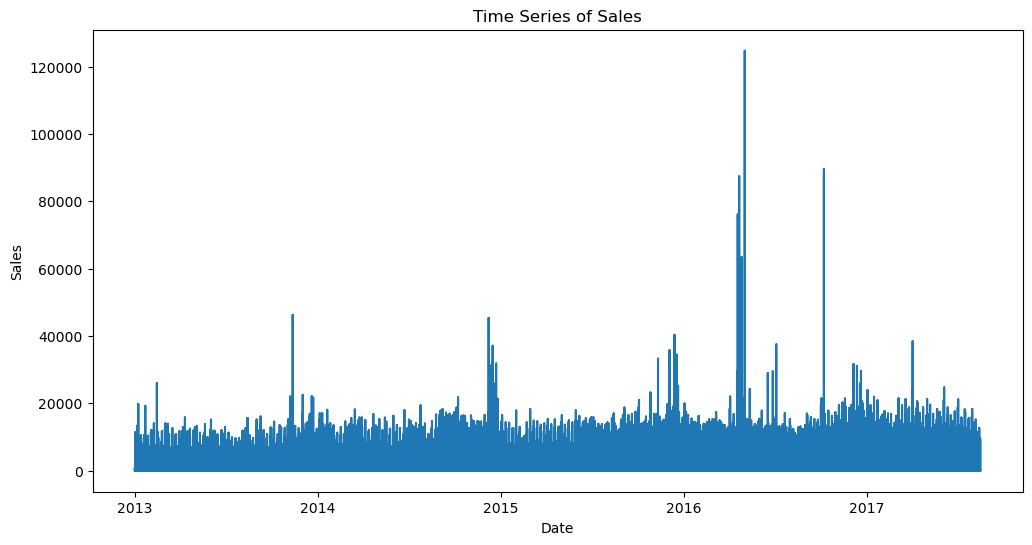

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the time series of sales
plt.figure(figsize=(12, 6))
plt.plot(df_train['date'], df_train['sales'])
plt.title('Time Series of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

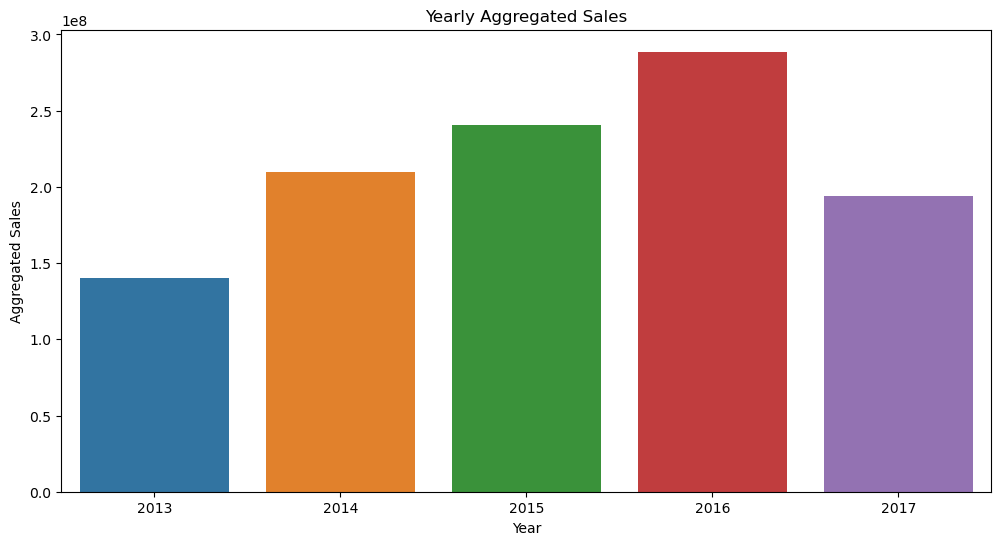

In [15]:
# Group the data by year and visualize aggregated sales
df_yearly = df_train.groupby(df_train['date'].dt.year)['sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='sales', data=df_yearly)
plt.title('Yearly Aggregated Sales')
plt.xlabel('Year')
plt.ylabel('Aggregated Sales')
plt.show()

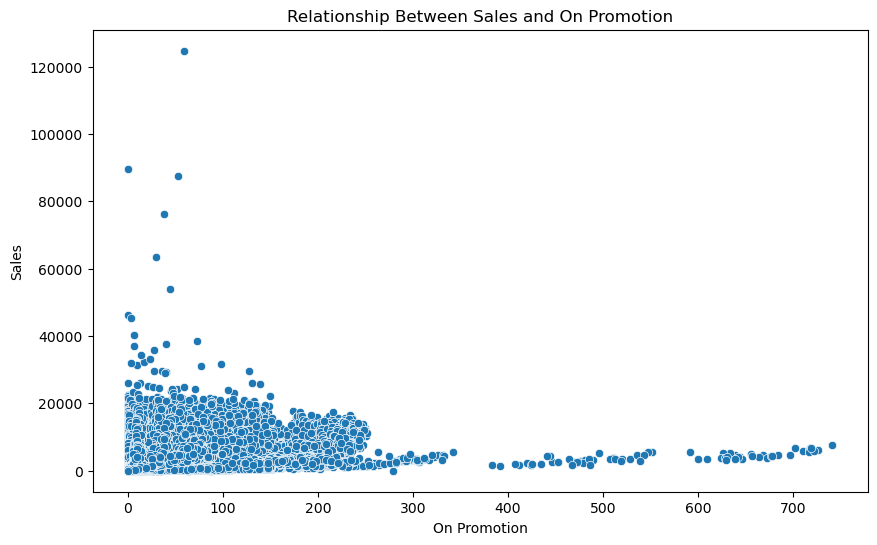

In [16]:
# Explore the relationship between sales and 'onpromotion'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='onpromotion', y='sales', data=df_train)
plt.title('Relationship Between Sales and On Promotion')
plt.xlabel('On Promotion')
plt.ylabel('Sales')
plt.show()

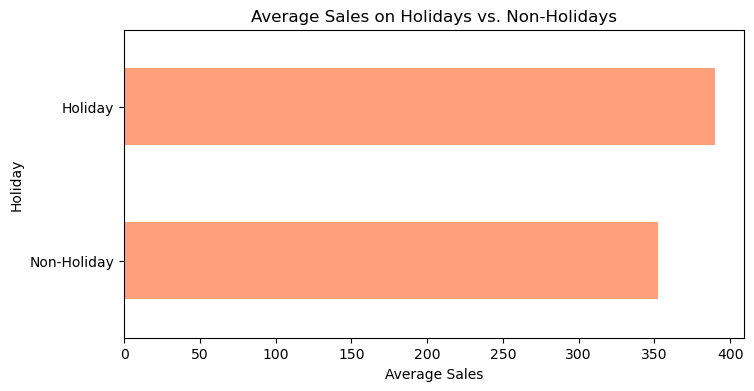

In [24]:
# Visualize the impact of holidays on sales
plt.figure(figsize=(8, 4))

# Create 'is_holiday' column
df_train['is_holiday'] = df_train['date'].isin(df_holidays['date']).astype(int)
df_test['is_holiday'] = df_t['date'].isin(df_holidays['date']).astype(int)

df_train.groupby('is_holiday')['sales'].mean().plot(kind='barh', color='lightsalmon')
plt.title('Average Sales on Holidays vs. Non-Holidays')
plt.yticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.ylabel('Holiday')
plt.xlabel('Average Sales')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in df_train.columns:
    if df_train[col].dtypes=='object':
        df_train[col]=labelencoder.fit_transform(df_train[col])
        
for col_name in df_test.columns:
    if df_test[col_name].dtypes=='object':
        df_test[col_name]=labelencoder.fit_transform(df_test[col_name])

In [19]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,weekday,weekend,is_holiday
0,0,2013-01-01,1,0,0.0,0,2013,1,1,1,0,1
1,1,2013-01-01,1,1,0.0,0,2013,1,1,1,0,1
2,2,2013-01-01,1,2,0.0,0,2013,1,1,1,0,1
3,3,2013-01-01,1,3,0.0,0,2013,1,1,1,0,1
4,4,2013-01-01,1,4,0.0,0,2013,1,1,1,0,1


In [26]:
df_test.head()

,id,date,store_nbr,family,onpromotion,year,month,day,weekday,weekend,is_holiday
0,3000888,2017-08-16,1,0,0,2017,8,16,2,0,0
1,3000889,2017-08-16,1,1,0,2017,8,16,2,0,0
2,3000890,2017-08-16,1,2,2,2017,8,16,2,0,0
3,3000891,2017-08-16,1,3,20,2017,8,16,2,0,0
4,3000892,2017-08-16,1,4,0,2017,8,16,2,0,0


<Axes: >

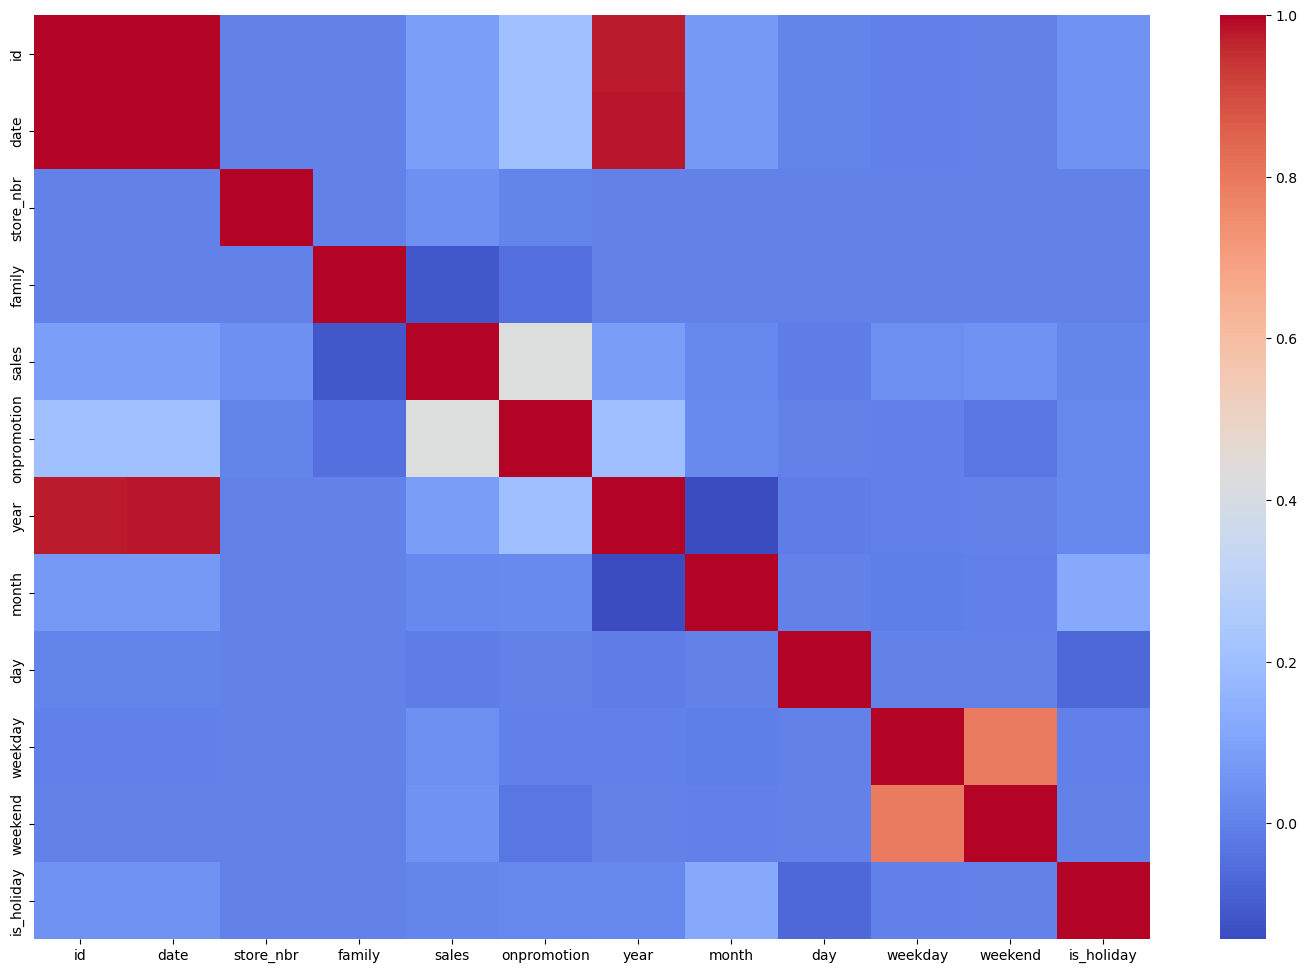

In [27]:
plt.figure(figsize=(18,12))
sns.heatmap(df_train.corr(),cmap='coolwarm')

In [28]:
X_train = df_train.drop(['id','sales','date'],axis=1)
y_train = df_train['sales']

X_test = df_test.drop(['id','date'],axis=1)
y_test = results['sales']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000888, 9)
(3000888,)
(28512, 9)
(28512,)


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(3000888, 9)
(28512, 9)


In [30]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error  # Import mean_squared_error

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_samples': [20, 40, 60]
}

lgbr = lgb.LGBMRegressor()

# Use mean_squared_error as the scoring metric
grid_search = GridSearchCV(estimator=lgbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 2000592, number of used features: 9
[LightGBM] [Info] Start training from score 415.778624
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 2000592, number of used features: 9
[LightGBM] [Info] Start training from score 350.547691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

In [32]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

Parameters = {'colsample_bytree': 0.8, 
               'learning_rate': 0.1, 
               'min_child_samples': 20, 
               'n_estimators': 200, 
               'num_leaves': 100, 
               'subsample': 0.8}

model_lgb = LGBMRegressor(**Parameters)
model_lgb.fit(X_train, y_train)
pred_lgb = model_lgb.predict(X_test)
mse_lgb = mean_squared_error(y_test, pred_lgb)
lgb_rmse = np.sqrt(mse_lgb)
print("rmse_lgb:", lgb_rmse)

results_data = pd.DataFrame({'id': df_test.id, 'sales': pred_lgb})
print(results_data)
results_data.to_csv('results_data.csv', index=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 3000888, number of used features: 9
[LightGBM] [Info] Start training from score 357.775749
rmse_lgb: 1260.6374049594287
            id        sales
0      3000888   -28.600919
1      3000889   -28.600919
2      3000890   -72.062268
3      3000891  2176.224725
4      3000892    -7.467412
...        ...          ...
28507  3029395   341.401590
28508  3029396   122.574221
28509  3029397  1090.004353
28510  3029398   254.419582
28511  3029399    41.934000

[28512 rows x 2 columns]


In [33]:
results_data.head()

,id,sales
0,3000888,-28.600919
1,3000889,-28.600919
2,3000890,-72.062268
3,3000891,2176.224725
4,3000892,-7.467412
